# News Exploration

Explore all data from news and look at what we have compile these together.

Get the news data from

https://webz.io/free-datasets/financial-news-articles/

In [16]:
import pandas as pd
import json
import os
from glob import glob
import matplotlib.pyplot as plt

from transformers import BertTokenizer

In [2]:
# Directory containing JSON files
folder_path = 'news_data'



In [3]:
# get all json files
all_news_files = []

all_news_files += glob("news_data_all/666_webhose-2015-07_20170904105917/*.json")

all_news_files += glob("news_data_all/666_webhose-2015-08_20170904105554/*.json")

all_news_files += glob("news_data_all/666_webhose-2015-09-new_20170904105713/*.json")

all_news_files += glob("news_data_all/666_webhose-2015-10-new_20170904105820/*.json")


In [4]:
len(all_news_files) # https://webz.io/free-datasets/financial-news-articles/ # matches with the 47.851 news articles from before!!

47851

In [5]:

# List to hold all dataframes
dataframes = []

# Iterate over each file in the directory
for filename in all_news_files: #os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = filename #os.path.join(folder_path, filename)
        
        # Open and load the JSON file
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            
            # Flatten the JSON data and convert to DataFrame
            # Adjust the record_path and meta parameters as per your JSON structure
            df = pd.json_normalize(json_data, sep='_')
            dataframes.append(df)

# Concatenate all dataframes into a single one
final_df = pd.concat(dataframes, ignore_index=True)

# Display the DataFrame
print(final_df) # roghtly 1 minute file rad for wsl - use this first and then save it later


# FOR ALL FILES TAKES AROUND 9 MINUTES TO RUN IN TOTAL!!


KeyboardInterrupt: 

In [13]:
final_df

,organizations,uuid,author,url,ord_in_thread,title,locations,highlightText,language,persons,...,thread_participants_count,thread_title_full,thread_spam_score,thread_site_type,thread_published,thread_replies_count,thread_uuid,entities_persons,entities_locations,entities_organizations
0,"[Union Bank, Asset Quality Deteriorates Union ...",8f18295606e9e2b303d3acd27b27559ea3fabc8a,,http://www.goodreturns.in/news/2015/07/28/unio...,0,Union Bank Q1 Net Profits Rise; Asset Quality ...,[],,english,[],...,0,Union Bank Q1 Net Profits Rise; Asset Quality ...,0.0,news,2015-07-28T09:51:00.000+03:00,0,8f18295606e9e2b303d3acd27b27559ea3fabc8a,[],[],[]
1,[],a89e7019628a2389a579c60eefb374e9306d1778,Reuters,http://www.reuters.com/article/2015/07/29/anad...,0,Anadarko not interested in selling down Mozamb...,[],,english,[],...,1,Anadarko not interested in selling down Mozamb...,0.0,news,2015-07-29T18:33:00.000+03:00,0,a89e7019628a2389a579c60eefb374e9306d1778,[],[],[]
2,[],1a6be71bd6645447e7e5672573507168c017da25,Reuters,http://www.reuters.com/article/2015/07/29/euro...,0,"Greek debt restructuring is inevitable, says I...",[],,english,[],...,1,"Greek debt restructuring is inevitable, says I...",0.0,news,2015-07-29T19:08:00.000+03:00,0,1a6be71bd6645447e7e5672573507168c017da25,[],[],[]
3,[],16580551a1f07ca293ff47d84a1cb3b33cc96256,Reuters,http://www.reuters.com/article/2015/07/29/braz...,0,Brazil says remains committed with fiscal aust...,[],,english,[],...,1,Brazil says remains committed with fiscal aust...,0.0,news,2015-07-29T05:02:00.000+03:00,0,16580551a1f07ca293ff47d84a1cb3b33cc96256,[],[],[]
4,[],2df630f95b782d383702a09d3749f80f987a8830,AP,http://www.telegraph.co.uk/finance/newsbysecto...,0,"Twitter is 'too difficult to use', says financ...",[],,english,[],...,1,"Twitter is 'too difficult to use', says financ...",0.0,news,2015-07-29T01:52:00.000+03:00,0,2df630f95b782d383702a09d3749f80f987a8830,[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47846,[],0cf9fba718977346252bacfc7cdd413ae4eb3805,afr.com,http://www.afr.com/business/sport/queenslander...,0,Queenslanders face off in battle for league's ...,[],,english,[],...,1,Queenslanders face off in battle for league's ...,0.0,news,2015-10-01T16:01:00.000+03:00,0,0cf9fba718977346252bacfc7cdd413ae4eb3805,[],[],[]
47847,[],81c34d442537d29054049af0630d56e37c61d675,Reuters,http://www.reuters.com/article/2015/10/02/albe...,0,REFILE-UPDATE 1-Supermarket chain Albertsons I...,[],,english,[],...,1,REFILE-UPDATE 1-Supermarket chain Albertsons I...,0.0,news,2015-10-02T20:31:00.000+03:00,0,81c34d442537d29054049af0630d56e37c61d675,[],[],[]
47848,[],ea606a2ba97c24270baca4fe4531091cef511776,Howard Schneider,http://www.reuters.com/article/2015/10/02/usa-...,0,Weak U.S. jobs report leaves Federal Reserve t...,[],,english,[],...,1,Weak U.S. jobs report leaves Federal Reserve t...,0.0,news,2015-10-02T19:35:00.000+03:00,0,ea606a2ba97c24270baca4fe4531091cef511776,[],[],[]
47849,"[WeatherBug, Mimo, Tyco, GE, Lutron Electronic...",61d877d8a9bdb391c859bddac18f09cd9d98ad61,,http://businesswireindia.com/news/news-details...,0,"Nest Introduces Nest Weave, Creating Most Comp...","[France, Hayward, U.S., Canada, Belgium, Daiki...",,english,"[Mimo, Linus Yale, Legrand, Power, Jason Willi...",...,0,"Nest Introduces Nest Weave, Creating Most Comp...",0.0,news,2015-10-02T12:47:00.000+03:00,0,61d877d8a9bdb391c859bddac18f09cd9d98ad61,[],[],[]


In [14]:
final_df.shape # matches evrything so it is fine

(47851, 42)

In [ ]:
final_df.to_json("processed_data/compiled_news_all.json", orient="records")

# Load the regular data 

And review the data for interesting information

## Initial conclusion

Looking at the data, there are no columns with labels, so we will use open ai to create the labels on our behalf here, and truncate at 4000 tokens if need be.

Use the GPT 3.5-turbo to get the labels. Compare the budget for what we need for the labels.

Because there are means of the cost, make decision of the labels - for the information content - to generalise well, with **diverse** datasets. And in particular get particular signal.

Why

1. Data is generated not given - e.g. surveys etc., but a lot of the time online
1. Often data do not have labels, especially if a new study, and therefore we need to manually label this data ourselves!!
1. Therefore we need to use somehow an automatic way of getting these labels (efficiently and cheaply) to build models for understanding structure and task
1. Introduction of semi-supervised learning (simple models, LLMs BERT), now even larger LLMs to train sophisticated models
1. Evaluate the effectiveness of this approach - in the context of news data where we generally as an example of text data collected, and no labels.
    1. Simplification of a general task, and method, which can be applied to another ML tasks and methods. (just exploring one specific aspect)

Things for consideration

1. Generalisation of the semi supervised learning approach
1. Implementation of approach
    1. Specifying a clear objective
    1. Budget considerations, informative content and diversity of content
    1. How to engineer the prompts - of Chat GPT to give us the most relevant labels for our task
    1. Finding the most relevant information to get content
    1. Length of news articles to analyse
        1. Models have a limited context window for BERT and existing approaches means we need to pick the data appropriately for training and evaluation
        1. and also generalisation. -  which articles should be selected.
        1. For example could target short articles by word length etc.
        1. based on all the data available, 47k articles - rich diversity - over 3 months - this is the first one.

1. Genrealisation - scrapping service, with implementation 

1. For Replication, will give link to data, and also where the source came from
1. And also open AI code which will give us useful replication - to replicate a dataset for training.
1. How to make the best use Closed source LLMs to increase the performance of Open sourced models and approaches


Studying the architecture of the news - it is actually quite expensive, so we want to simplify this workflow
    


In [6]:
pd.set_option('display.max_rows', 100)

In [7]:
final_df = pd.read_json("processed_data\compiled_news_all.json")

In [8]:
final_df.shape

(47851, 42)

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47851 entries, 0 to 47850
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   organizations                      47851 non-null  object 
 1   uuid                               47851 non-null  object 
 2   author                             47851 non-null  object 
 3   url                                47851 non-null  object 
 4   ord_in_thread                      47851 non-null  int64  
 5   title                              47851 non-null  object 
 6   locations                          47851 non-null  object 
 7   highlightText                      47851 non-null  object 
 8   language                           47851 non-null  object 
 9   persons                            47851 non-null  object 
 10  text                               47851 non-null  object 
 11  external_links                     47851 non-null  obj

## ON Non-nulls

It seems that all data is here without nulls.

However, we will manually review the data for any strange characters and urls - or any strange traits

1. Review any article examples that have these or HTML artifacts and remove them.

In [10]:
# check language

# all languages here are all english

final_df[["uuid", "language"]].groupby("language").count()

,uuid
language,
english,47851


In [11]:
final_df[["uuid", "crawled"]].groupby("crawled").count() # uuid - all unique

,uuid
crawled,
2015-07-01T00:05:28.000+03:00,1
2015-07-01T00:06:09.000+03:00,1
2015-07-01T00:07:26.000+03:00,1
2015-07-01T00:07:59.000+03:00,1
2015-07-01T00:08:19.000+03:00,1
...,...
2015-10-26T23:37:31.297+02:00,1
2015-10-26T23:39:25.600+02:00,1
2015-10-26T23:40:08.832+02:00,1


In [12]:
# explore sources with the site_full column

final_df[["uuid", "thread_site_full"]].groupby("thread_site_full").count().sort_values("uuid",ascending=False)

,uuid
thread_site_full,
uk.finance.yahoo.com,7271
www.reuters.com,4100
www.afr.com,3478
business-news.thestreet.com,2742
finance.yahoo.com,2208
...,...
easternleague.teamworkonline.com,1
strategie.e15.cz,1
e-svet.e15.cz,1


Text(0.5, 1.0, 'Top Sources Count')

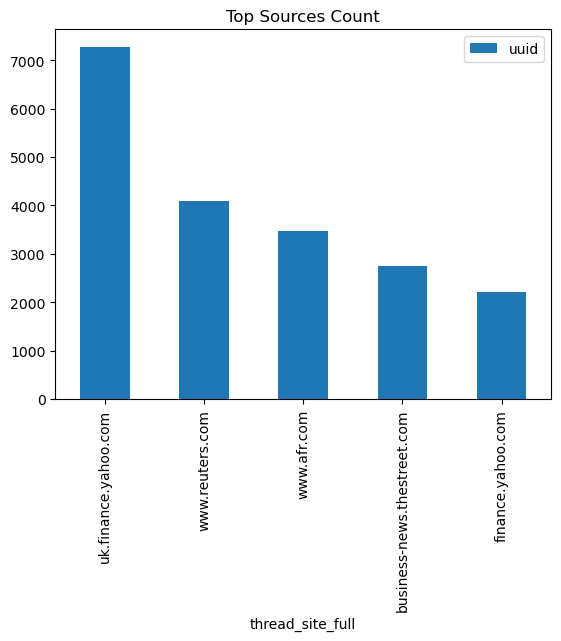

In [17]:
final_df[["uuid", "thread_site_full"]].groupby("thread_site_full").count().sort_values("uuid",ascending=False).iloc[:5].plot.bar()
plt.title("Top Sources Count")

In [9]:
# some useful data to review these, and get the most meaningful for selection and combine these together!!

# get the relevant credible sources

In [10]:
# Check sources by their 

Sample the meaningful title and text details

To assess information. We see that there is actually important information.

In [19]:
df_useful_sources = final_df[final_df["thread_site_full"].isin(["www.bloomberg.com", "uk.finance.yahoo.com", "www.reuters.com"])]

In [20]:
df_useful_sources["text_full"] = df_useful_sources["title"] + "\n" + df_useful_sources["text"]

C:\Users\bingf\AppData\Local\Temp\ipykernel_42860\3045314449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_sources["text_full"] = df_useful_sources["title"] + "\n" + df_useful_sources["text"]


In [21]:
df_useful_sources["text_full"].values[4]

'Junk Bondholders Weigh Emerging-Market Exit From Benchmark Index\nBank of America Corp. will decide this week whether to remove emerging-market companies from its $2.2 trillion global high-yield index.\nThe lender asked junk-bond investors to vote on the matter as part of an annual review of its benchmarks after a slew of downgrades to Brazilian and Russian companies boosted their share of the index. Bank of America said it will implement any changes at the end of September.\nThe decision pits investors who want the measure to better reflect the corporate high-yield market against those seeking higher yields associated with extra political risk. A removal of emerging-market companies, which accounted for 18 percent of the index at the end of March, may trigger price swings if bondholders are forced to sell those securities and raise funding costs for excluded companies.\n“It may be detrimental if emerging-market companies were removed from the index because this could narrow the inves

In [22]:
df_useful_sources["text"].values[4]

'Bank of America Corp. will decide this week whether to remove emerging-market companies from its $2.2 trillion global high-yield index.\nThe lender asked junk-bond investors to vote on the matter as part of an annual review of its benchmarks after a slew of downgrades to Brazilian and Russian companies boosted their share of the index. Bank of America said it will implement any changes at the end of September.\nThe decision pits investors who want the measure to better reflect the corporate high-yield market against those seeking higher yields associated with extra political risk. A removal of emerging-market companies, which accounted for 18 percent of the index at the end of March, may trigger price swings if bondholders are forced to sell those securities and raise funding costs for excluded companies.\n“It may be detrimental if emerging-market companies were removed from the index because this could narrow the investor base,” said Ulrich Gerhard, a London-based fund manager at Ins

In [23]:
df_useful_sources["word_count"] = df_useful_sources["text_full"].str.split().str.len()

C:\Users\bingf\AppData\Local\Temp\ipykernel_42860\4092782420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful_sources["word_count"] = df_useful_sources["text_full"].str.split().str.len()


In [24]:
df_useful_sources[["thread_site_full", "word_count"]].groupby("thread_site_full").describe()

word_count                                               \
                          count        mean         std   min     25%    50%   
thread_site_full                                                               
uk.finance.yahoo.com     7271.0  524.390593  443.413630  19.0  316.00  460.0   
www.bloomberg.com        1462.0  463.785910  258.521665  29.0  280.25  415.0   
www.reuters.com          4100.0  351.343659  268.383891  20.0  133.75  312.5   

                                      
                        75%      max  
thread_site_full                      
uk.finance.yahoo.com  672.0  23234.0  
www.bloomberg.com     605.0   3088.0  
www.reuters.com       476.0   3380.0

In [22]:
df_useful_sources[["thread_site_full", "text"]].groupby("thread_site_full").count()

# reasonable to get these sources - for financial news - combined useful.

,text
thread_site_full,
uk.finance.yahoo.com,7271
www.bloomberg.com,1462
www.reuters.com,4100


In [27]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [28]:
# count the tokens in each article, and then evaluate how many news articles we can keep!!

def count_tokens(text):
    return len(tokenizer.encode(text, add_special_tokens=True))

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import logging
logging.getLogger("transformers.tokenization_utils").setLevel(logging.ERROR)


# remove warning for long fitler warnings
# https://github.com/huggingface/transformers/issues/991


In [31]:
# get the token count

# Apply the function to your DataFrame
df_useful_sources['token_count'] = df_useful_sources['text_full'].apply(count_tokens)

# a bit slow - takes about 2 minutes to run, but still quite quite fast

In [32]:
# evaluate word token

df_useful_sources[["thread_site_full", "token_count"]].groupby("thread_site_full").describe()

token_count                                               \
                           count        mean         std   min     25%    50%   
thread_site_full                                                                
uk.finance.yahoo.com      7271.0  715.457846  618.831986  29.0  427.00  624.0   
www.bloomberg.com         1462.0  614.033516  340.415961  37.0  379.00  549.0   
www.reuters.com           4100.0  472.429024  358.232733  28.0  183.75  421.0   

                                      
                        75%      max  
thread_site_full                      
uk.finance.yahoo.com  900.0  32322.0  
www.bloomberg.com     795.0   4234.0  
www.reuters.com       643.0   5745.0

In [33]:
# filter word column by article size, either by word count (title + main text body) for less than 512 to count

df_useful_sources_short_articles = df_useful_sources[df_useful_sources["token_count"] <= 512]

Text(0.5, 1.0, 'Article Count by Source after filtering for 512 tokens or less')

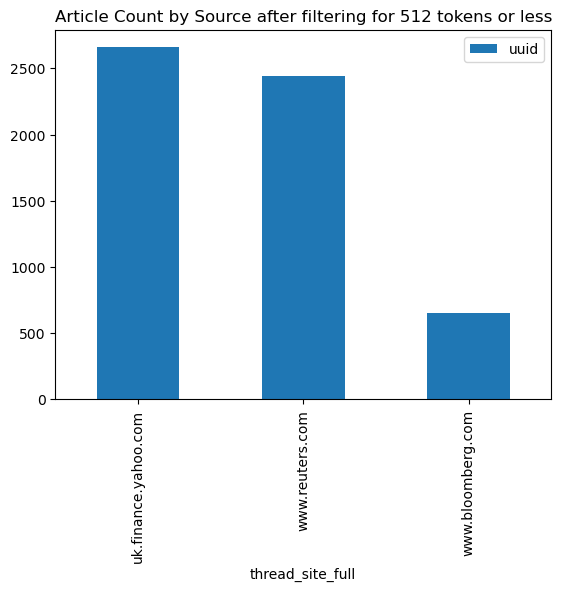

In [37]:
df_useful_sources_short_articles[["uuid", "thread_site_full"]].groupby("thread_site_full").count().sort_values("uuid",ascending=False).iloc[:5].plot.bar()
plt.title("Article Count by Source after filtering for 512 tokens or less")

In [34]:
df_useful_sources_short_articles.shape

(5748, 45)

In [34]:
# output these news articles

file_name = "processed_data/compiled_news_all_bert_compliant.json"

df_useful_sources_short_articles.to_json(file_name, orient="records")

# df_useful_sources_short_articles = pd.read_json(file_name)

# Plan 

If the news articles are not enough - then add other sources where needed for review!!

If it doesn't fit into BERT then re-run the cells to get what you need!!

In [36]:
df_useful_sources_short_articles[["thread_site_full","title", "text", "word_count"]] # at a glance a lot of these are short words

,thread_site_full,title,text,word_count
1,www.reuters.com,Anadarko not interested in selling down Mozamb...,"HOUSTON, July 29 Anadarko Petroleum Corp has n...",90
2,www.reuters.com,"Greek debt restructuring is inevitable, says I...","WASHINGTON, July 29 Greece's international cre...",264
3,www.reuters.com,Brazil says remains committed with fiscal aust...,"BRASILIA, July 28 Brazil's government said on ...",100
5,www.reuters.com,"Chevron to lay off 1,500 workers amidst oil pr...","July 28 Chevron Corp, the second-largest U.S. ...",214
10,www.bloomberg.com,Junk Bondholders Weigh Emerging-Market Exit Fr...,Bank of America Corp. will decide this week wh...,371
...,...,...,...,...
47786,www.reuters.com,"Bye bye Google, hello Alphabet",Oct 2 Google Inc is on the verge of morphing i...,242
47796,www.bloomberg.com,Richemont Says Gain From Yoox Merger to Boost ...,Cie. Financiere Richemont SA said full-year pr...,128
47811,uk.finance.yahoo.com,Digital Video Content Market – Technavio Publi...,"Tip : Use comma (,) to separate multiple quote...",299
47826,www.reuters.com,Lew rules out letting Congress extract 'unacce...,WASHINGTON Oct 8 U.S. Treasury Secretary Jack ...,356


<Axes: >

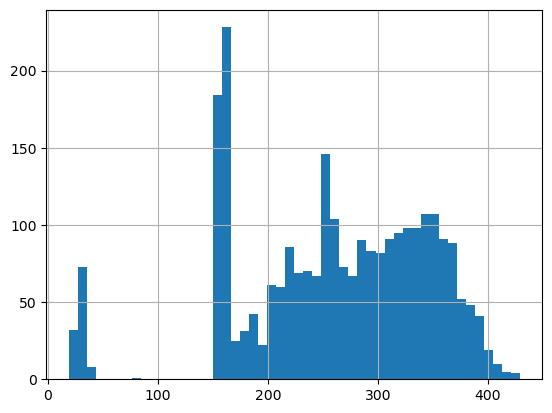

In [38]:
# draw the histogram for these!!

df_useful_sources_short_articles[df_useful_sources_short_articles["thread_site_full"] == "uk.finance.yahoo.com"]["word_count"].hist(bins=50) 

<Axes: >

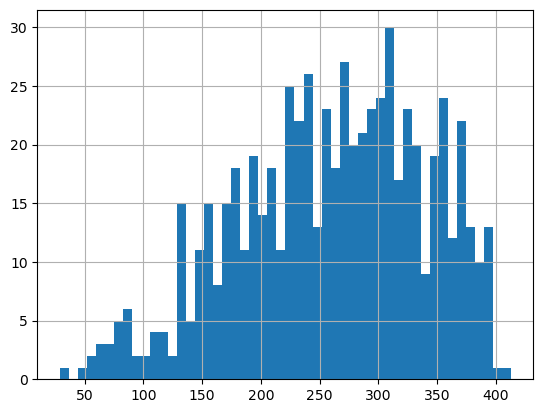

In [39]:
df_useful_sources_short_articles[df_useful_sources_short_articles["thread_site_full"] == "www.bloomberg.com"]["word_count"].hist(bins=50) 

<Axes: >

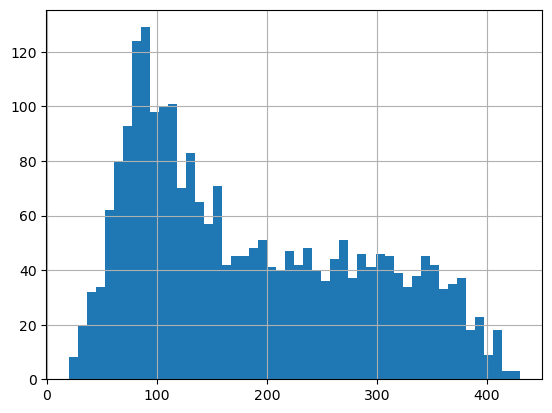

In [40]:
df_useful_sources_short_articles[df_useful_sources_short_articles["thread_site_full"] == "www.reuters.com"]["word_count"].hist(bins=50) 

In [ ]:
# look at the histogram of words each with word count to review - get the combination of the data together!!

In [41]:
res_sample = df_useful_sources_short_articles.sample(50)

In [42]:
res_sample

,organizations,uuid,author,url,ord_in_thread,title,locations,highlightText,language,persons,...,thread_site_type,thread_published,thread_replies_count,thread_uuid,entities_persons,entities_locations,entities_organizations,word_count,text_full,token_count
16213,[],c5d7bc07b3bb5bf01c27056fe707b6fedc6c9adf,,https://uk.finance.yahoo.com/news/europes-car-...,0,Europe's Car Industry Shifts Earnings Speeds -...,[Europe],,english,[],...,news,2015-08-04T16:39:00.000+03:00,0,c5d7bc07b3bb5bf01c27056fe707b6fedc6c9adf,[],[],[],188,Europe's Car Industry Shifts Earnings Speeds -...,246
28886,[],33b41ebb1db67d063a29e7543df028c007f90151,,https://uk.finance.yahoo.com/news/global-econo...,0,Global economy faces financial bubble from cen...,[],,english,[Schaeuble],...,news,2015-09-11T21:25:00.000+03:00,0,33b41ebb1db67d063a29e7543df028c007f90151,[],[],[],215,Global economy faces financial bubble from cen...,289
40677,[],7b13c3da155680fa67a26d07438540157b8f9c0d,,https://uk.finance.yahoo.com/news/end-day-mess...,0,End of Day Message,[],,english,[],...,news,2015-10-21T20:30:00.000+03:00,0,7b13c3da155680fa67a26d07438540157b8f9c0d,[],[],[],235,"End of Day Message\nTip : Use comma (,) to sep...",332
2212,[],ce3ab80f02934b7af6f22797fc17699fc67ddb8f,Reuters,http://www.reuters.com/article/2015/07/14/idUS...,0,BRIEF-Alberta Star Development announces name ...,[],,english,[],...,news,2015-07-14T21:21:00.000+03:00,0,ce3ab80f02934b7af6f22797fc17699fc67ddb8f,[],[],[],35,BRIEF-Alberta Star Development announces name ...,51
30845,[],8654ca2694d7b3b90f4d724da1c67a905d7321b6,Reuters,http://www.reuters.com/article/2015/09/22/boei...,0,Boeing CEO sees scope for additional 737 work ...,[],,english,[],...,news,2015-09-22T20:39:00.000+03:00,0,8654ca2694d7b3b90f4d724da1c67a905d7321b6,[],[],[],124,Boeing CEO sees scope for additional 737 work ...,161
32429,[],ef75b66cf6b5ca3408776ce188ac986d16305e0d,Reuters,http://www.reuters.com/article/2015/09/24/japa...,0,Japan Aug core CPI posts first year/year fall ...,[],,english,[],...,news,2015-09-25T03:35:00.000+03:00,0,ef75b66cf6b5ca3408776ce188ac986d16305e0d,[],[],[],77,Japan Aug core CPI posts first year/year fall ...,102
7179,[],abe5008e8af5631fd513a7a18b7f6af7d432c600,Reuters,http://www.reuters.com/article/2015/07/21/appl...,0,Apple's smartwatch beat internal expectations ...,[],,english,[],...,news,2015-07-22T00:51:00.000+03:00,0,abe5008e8af5631fd513a7a18b7f6af7d432c600,[],[],[],80,Apple's smartwatch beat internal expectations ...,106
44211,[],c12309f992027080cebd18af187a905dd2d032c9,Reuters,http://www.reuters.com/article/2015/10/23/us-b...,0,MOVES-US Bancorp's wealth unit names Campbell ...,[],,english,[],...,news,2015-10-24T01:23:00.000+03:00,0,c12309f992027080cebd18af187a905dd2d032c9,[],[],[],86,MOVES-US Bancorp's wealth unit names Campbell ...,124
3550,[],1f1c722a1d4ed696e13ba5c9e24e94c3785ee9ce,,https://uk.finance.yahoo.com/news/china-firm-r...,0,China firm reins in platform blamed for stock ...,[China],,english,[],...,news,2015-07-16T10:26:00.000+03:00,0,1f1c722a1d4ed696e13ba5c9e24e94c3785ee9ce,[],[],[],308,China firm reins in platform blamed for stock ...,388
26596,[],37a009971f03d39a752bc31dc69d740e6b916e5e,,https://uk.finance.yahoo.com/news/danish-tax-a...,0,Danish tax agency possible victim of billion-d...,[],,english,[],...,news,2015-08-26T19:10:00.000+03:00,0,37a009971f03d39a752bc31dc69d740e6b916e5e,[],[],[],304,Danish tax agency possible victim of billion-d...,394


In [43]:
res_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 16213 to 5984
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   organizations                      50 non-null     object 
 1   uuid                               50 non-null     object 
 2   author                             50 non-null     object 
 3   url                                50 non-null     object 
 4   ord_in_thread                      50 non-null     int64  
 5   title                              50 non-null     object 
 6   locations                          50 non-null     object 
 7   highlightText                      50 non-null     object 
 8   language                           50 non-null     object 
 9   persons                            50 non-null     object 
 10  text                               50 non-null     object 
 11  external_links                     50 non-null     obj

In [44]:
# n.b. clear out the columns for what is not needed to get a better analysis

In [45]:
# Title detail, it could be useful - to check the title to review the workflow

res_sample["title"].to_list()


["Europe's Car Industry Shifts Earnings Speeds -- At A Glance",
 'Global economy faces financial bubble from central bank stimulus, Schaeuble warns',
 'End of Day Message',
 'BRIEF-Alberta Star Development announces name change to Elysee Development Corp.',
 'Boeing CEO sees scope for additional 737 work in China',
 'Japan Aug core CPI posts first year/year fall since April 2013',
 "Apple's smartwatch beat internal expectations - CFO",
 "MOVES-US Bancorp's wealth unit names Campbell Reynolds as private banker",
 'China firm reins in platform blamed for stock chaos',
 'Danish tax agency possible victim of billion-dollar scam',
 "Ponzi Suspect's 17 Accounts Raise Questions Over Bank Safeguards - Bloomberg Business",
 'CORRECTED-BRIEF-American Airlines says for Q2 expects to pay between $1.88-$1.93 per gallon of mainline jet fuel',
 'Toshiba At Centre Of $1.2bn Profit Scandal',
 'Kidnapping tale "Room" takes top prize at Toronto film festival',
 'UK accuses Spain of violating its sovereig

In [46]:
res_sample["text"].to_list()

# we do see that the article is useful.

# there are relevant topic details 

# and largely positive or negative is of clear relevance so it shows here that the data is there!!

# context of financial news - this is essentially most important. - but accept tolerance of errors, this is a good case in financial news for market impact, positive or negative is what matters.

# of course could do importance sampling of results to get meaningful samples for this workflow!! And dataset design for a model - get something

# balanced positive negative set - to make scores meaningful at 0.5 strength of association.

['Print BMW Raises Red Flag for Chinese Market \nA sharp drop in second-quarter operating profit at BMW’s car-making arm and a warning of possibly tougher conditions to come in China have given investors pause. Volkswagen similarly reported weaker China earnings. \nMercedes-Benz Is on a Roll \nDaimler turned in surprisingly strong earnings as new models like the C-Class sedan drove sales higher even in China. The German auto maker’s car division reported its first double-digit operating profit margin for years which at 10.5% compares well with market leader BMW’s 8.4%. \nPeugeot Powers Up \nPSA Peugeot Citroën, Europe’s No. 2 by production after Volkswagen, bounced back with its first net profit since 2011 in the six months through June. Peugeot got a boost from the recovering European market, on which it is heavily reliant, and recent cost cutting. \nRenault Overshadowed \nPeugeot’s turnaround put a robust performance by rival Renault in the shade. Despite better sales and earnings, R

## Ideas

Get the data from the most meaningful sources, with good quality news articles, with styles that are most likely positive and negative for review.

And get the most meaningful structure, select the data appropriately with the sample

Ideas:

1. Ingest all text get sentiment labels
1. Review diversity of data, with some samples see if there are useful sentiments
1. Explore title
1. Explore the entire text also - with pre-trained text models
1. Explore information content of information
1. Train sentiment classifier on all these methods
1. Evaluate the workflow on an unseen test set